In [ ]:
!pip install gdown

In [ ]:
!gdown 1ZuVduY88O-WDdvxR36f1PkY80gMfLema

Downloading...
From (original): https://drive.google.com/uc?id=1ZuVduY88O-WDdvxR36f1PkY80gMfLema
From (redirected): https://drive.google.com/uc?id=1ZuVduY88O-WDdvxR36f1PkY80gMfLema&confirm=t&uuid=229025ac-5fc8-4136-9878-aca4acd931e7
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 32.8MB/s]


In [ ]:
!unzip "Copy of Copy of devnagari digit.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

In [ ]:
img_height, img_width = 28, 28

In [ ]:
def load_images_from_folder(folder="/content/DevanagariHandwrittenDigitDataset"):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder))
  class_map = {name: i for i, name in enumerate(class_names)}
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
# Load image using PIL
      img = Image.open(img_path).convert("L")
      img = img.resize((img_width, img_height))
      img = np.array(img) / 255.0
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)

In [ ]:
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

In [ ]:
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


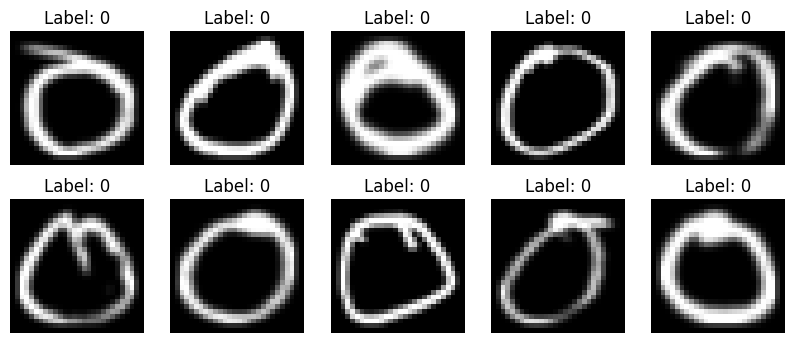

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

In [ ]:
x_train = x_train.reshape(-1, img_height, img_width, 1)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(),
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():

  inputs = keras.Input(shape=input_shape)

  x = keras.layers.Flatten()(inputs)

  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation="sigmoid")(x)
  x = keras.layers.Dense(256, activation="sigmoid")(x)

  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

functional_model = build_functional_model()
functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer="sgd",
  loss="categorical_crossentropy",
  metrics=["accuracy"]
)

In [ ]:
batch_size = 128
epochs = 2000

callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]

history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.15,
  callbacks=callbacks,
)

Epoch 1/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1078 - loss: 2.3147 - val_accuracy: 0.1063 - val_loss: 2.3038
Epoch 2/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1152 - loss: 2.3008 - val_accuracy: 0.1063 - val_loss: 2.3001
Epoch 3/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1160 - loss: 2.2995 - val_accuracy: 0.1063 - val_loss: 2.2985
Epoch 4/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1231 - loss: 2.2977 - val_accuracy: 0.1063 - val_loss: 2.2987
Epoch 5/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1202 - loss: 2.2960 - val_accuracy: 0.1063 - val_loss: 2.2962
Epoch 6/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1246 - loss: 2.2948 - val_accuracy: 0.1063 - val_loss: 2.2953
Epoch 7/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1264 - loss: 2.2929 - val_accuracy: 0.1063 - val_loss: 2.2926
Epoch 8/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1278 - loss: 2.2913 - 

In [ ]:
batch_size = 128
epochs = 2000

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

In [ ]:
history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.15,
  callbacks=callbacks,
)

Epoch 1/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9766 - loss: 0.0866 - val_accuracy: 0.9687 - val_loss: 0.1110
Epoch 2/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9763 - loss: 0.0861 - val_accuracy: 0.9689 - val_loss: 0.1107
Epoch 3/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9751 - loss: 0.0888 - val_accuracy: 0.9690 - val_loss: 0.1105
Epoch 4/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9756 - loss: 0.0885 - val_accuracy: 0.9682 - val_loss: 0.1106
Epoch 5/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9758 - loss: 0.0886 - val_accuracy: 0.9686 - val_loss: 0.1114
Epoch 6/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9768 - loss: 0.0842 - val_accuracy: 0.9689 - val_loss: 0.1101
Epoch 7/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9768 - loss: 0.0850 - val_accuracy: 0.9687 - val_loss: 0.1102
Epoch 8/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9764 - loss: 0.0854 -

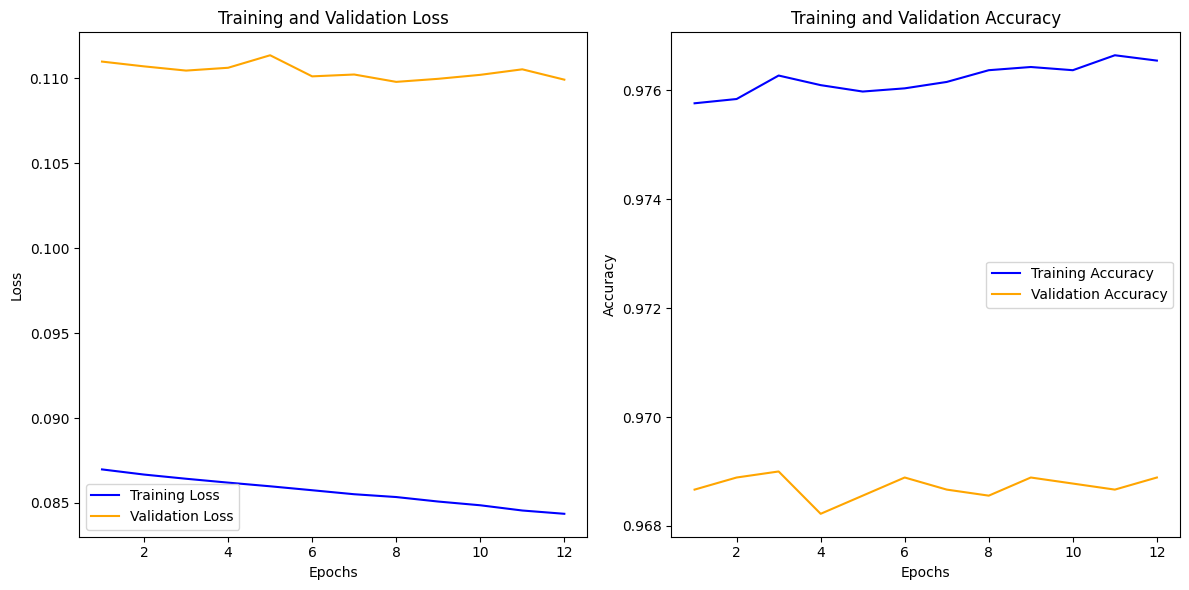

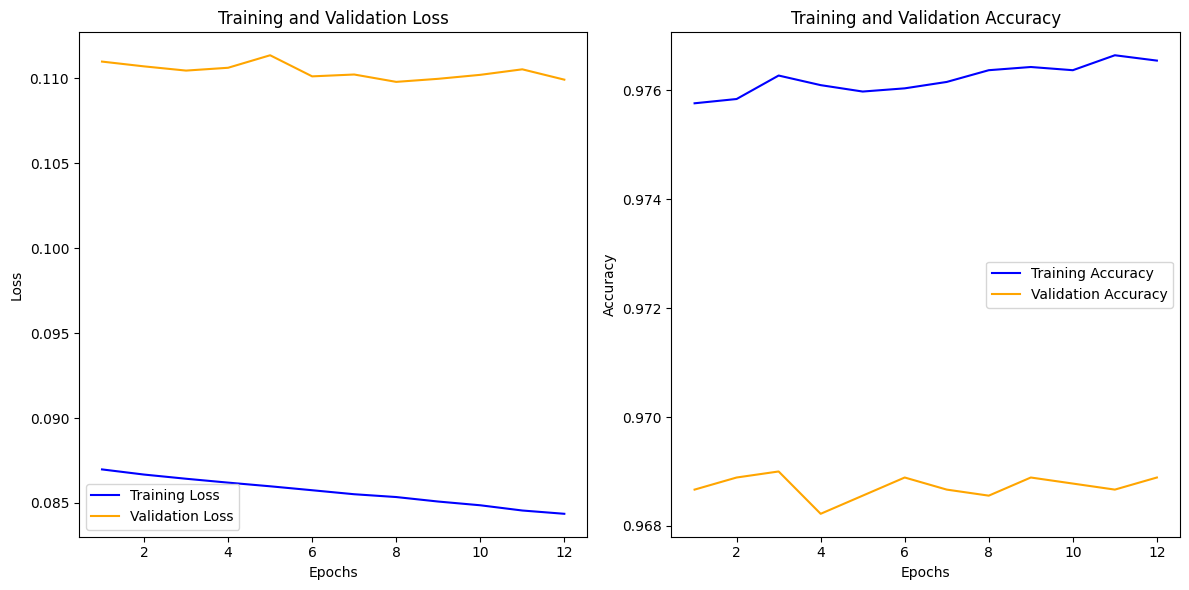

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9661 - loss: 0.1160
Test accuracy: 0.9661


In [ ]:
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label for first image: 7
True label for first image: 7
